# Run ADAM 

The model ADAM (Annual Danish Aggregate Model)is a model of the Danish
economy maintained and developed by Danmarks Statistik.  A Link to the model: https://www.dst.dk/pubomtale/18836. It has 4624 equations 

Danmarks Statistik has kindly provided the model version JUN17X and an associated databank for this demo. 

The model and databank is not the current model and forecast, but serves as an example. 

This is a basic demo. However you can use all the features of ModelFlow to manipulate the model.


## Import ModelFlow and Pandas

In [17]:
import pandas as pd
from modelclass import model 
model.modelflow_auto()

## Read model and databank
A precooked model including baseline, variable description is loaded and run 

In [18]:
madam,basedf =  model.modelload('adam/jul17x.pcim',run=1)    

# Make an experiment reducing  value added tax
Here you could make other experiment by changing other exogenous variables 

In [19]:
altdf = model.update_from_list(basedf, 'tg + -0.01 2018 2030')  # update the value added tax rate
result  = madam(altdf)                                          # run the model with the same parameters as in previous run

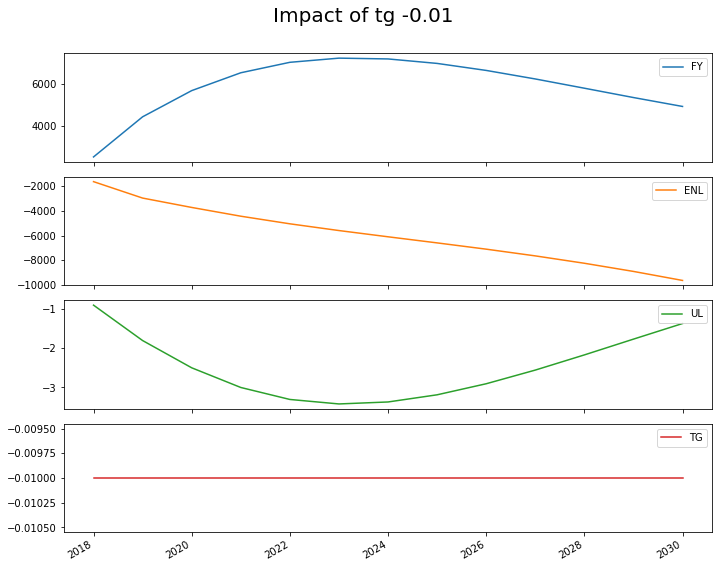

In [20]:
madam['fy enl ul tg'].dif.plot(colrow=1,sharey=0,title='Impact of tg -0.01');

# Make a range of experiments 

In [21]:
for tg_update in [0.0,0.01,0.02,0.03]:                                        # Loop over values for change in tg (value added tax rate)  
    eksdf = model.update_from_list(basedf,f'tg + {tg_update} 2018 2030')      # Update the baseline dataframe
    madam(eksdf,keep = f'Value added tax: change = {tg_update}',relconv=0.00001,silent=1);  # Run the model 

# Show the results for eksperiments 

In [22]:
madam.keep_viz('fy fm enl ul')

interactive(children=(SelectionRangeSlider(continuous_update=False, description='Show interval', index=(27, 39…

In [23]:
madam.var_description


{'ANDRE LØBENDE OVERFØRSLER FRA OFFENTLIG FORVALTNING OG SERVICE TIL HUSHOLDNINGER': '(mio. kr)',
 'BOWSDX': 'Underliggende stigning i dansk aktiekurs',
 'BOWSEX': 'Underliggende stigning i udenlandsk aktiekurs',
 'D4711': 'Dummy i ssyn-relation',
 'DPI': 'Eksogeniseringsdummy i Wpb_b,Wpsd_b og Wpse_b',
 'FKNCF': 'Nettokapital i finansiel selskabsektor',
 'FKNCR': 'Nettokapital i ikke-finansiel selskabsektor',
 'WPX_B': 'Sum af aktier og obligationer i Wp_b-portefølje, pensionsordninger i banker og depoter',
 'WPX_F': 'Sum af aktier og obligationer i Wp_f-portefølje, pensionsordninger i pensionskasser og livsforsikring',
 'IUWCP': 'Rente- og usbyttesats p.a. på pensionsformue i banker og LD',
 'IUWSD': 'Udbyttegrad af danske aktier',
 'IUWSDK': 'Udbyttesats p.a. på kommunalt ejede danske aktier',
 'IWP_B': 'Rente- og udbyttesats p.a. på pensioner i banker og depoter',
 'IWP_F': 'Rente- og udbyttesats p.a. på pensioner i pensionskasser og livsforsikring',
 'IWPD_B': 'Efter-skat rente- o